In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv", encoding = "ISO-8859-1") #1st column needs encoding to read pound/hashtag(#) symbol
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

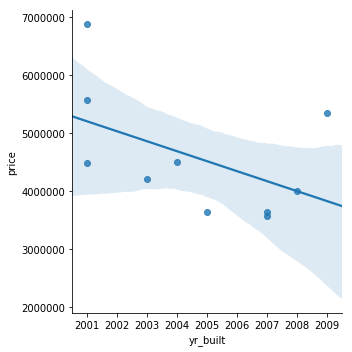

In [15]:
#make a scatterplot
subdf = df[(df['price'] > 3500000) & (df['yr_built'] > 2000)]
sns.lmplot(x='yr_built', y='price', data=subdf)

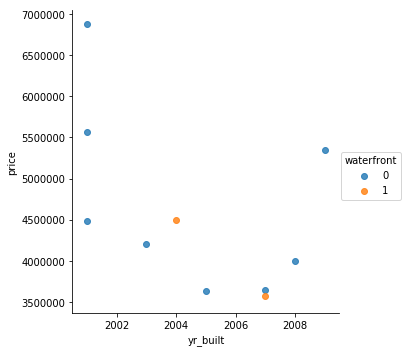

In [18]:
sns.lmplot(x='yr_built', y='price', data=subdf, 
           fit_reg=False, #remove regression line
           hue='waterfront')#color by waterfront

In [23]:
#create color palette
#color Hex numbers are from Bulbapedia (https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

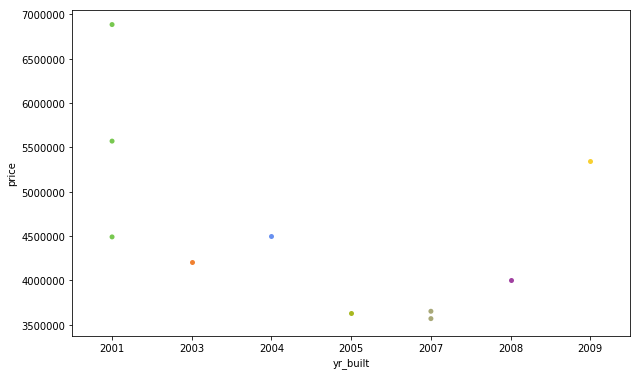

In [44]:
#swarm plot
plt.subplots(figsize=(10,6))
sns.swarmplot(x='yr_built', y='price', data=subdf, palette=pkmn_type_colors)

Text(0.5,1,'Properties with waterfront views')

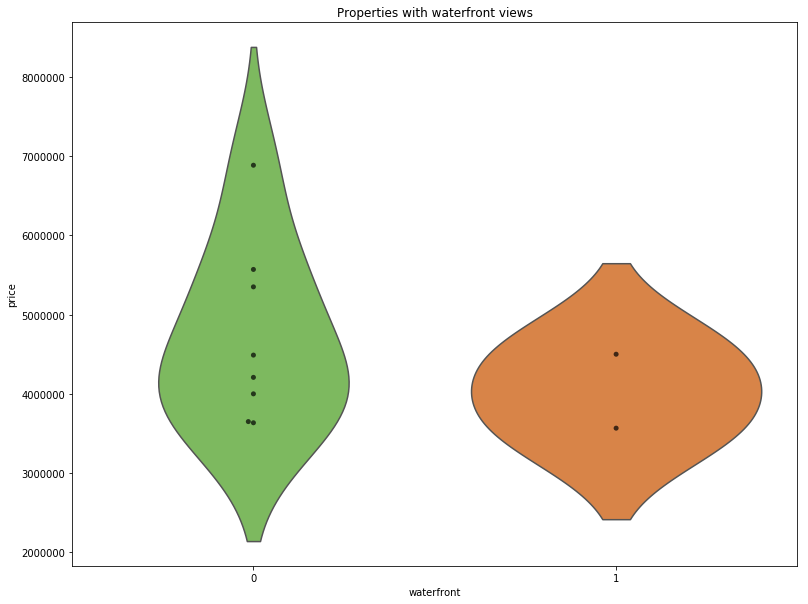

In [34]:
#combine a violin plot with a swarm plot
plt.figure(figsize=(13,10))
sns.violinplot(x='waterfront',
               y='price',
               data=subdf,
               inner=None, #removes bars inside violin plot
               palette=pkmn_type_colors)

sns.swarmplot(x='waterfront',
              y='price',
              data=subdf,
              color='k', #make points black
              alpha=0.7) #slightly transparent

plt.title('Properties with waterfront views')

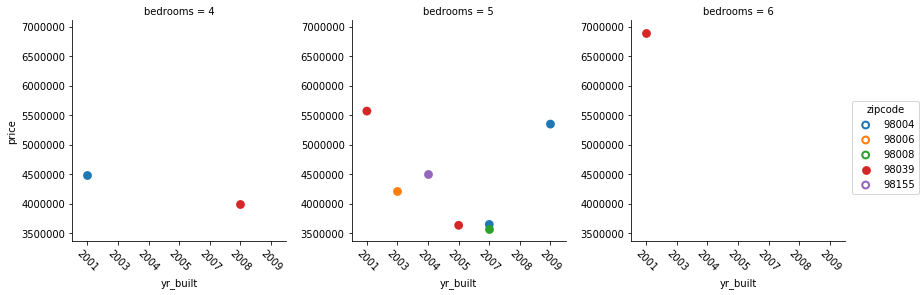

In [42]:
g = sns.factorplot(x='yr_built', y='price',
                   data=subdf,
                   hue='zipcode', 
                   col='bedrooms')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)
